Xử lý ảnh: ./hinh.jpg


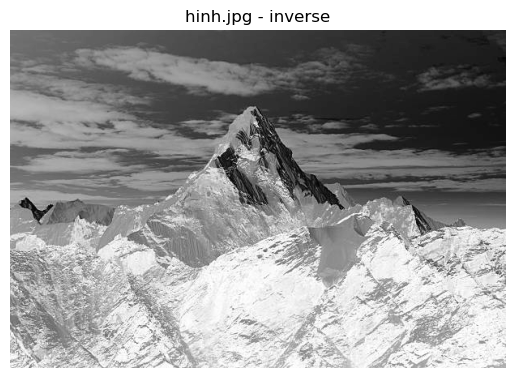

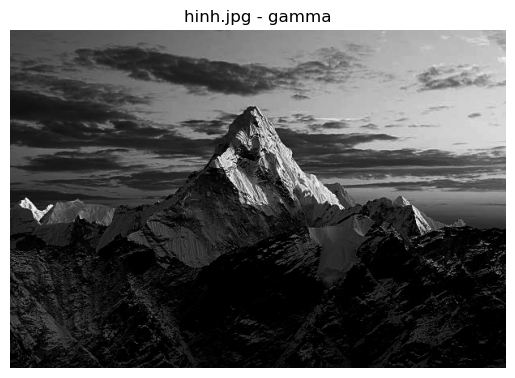

C:\Users\USER\AppData\Local\Temp\ipykernel_2944\1682102112.py:17: RuntimeWarning: divide by zero encountered in log
  img_log = c * np.log(1 + img)


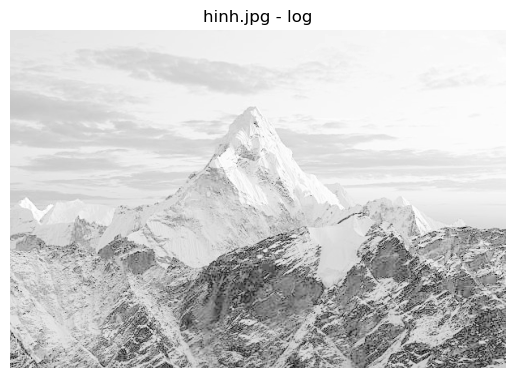

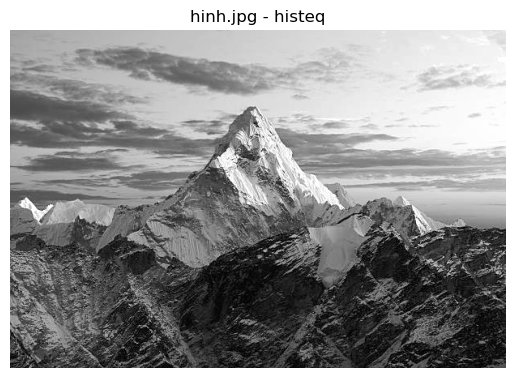

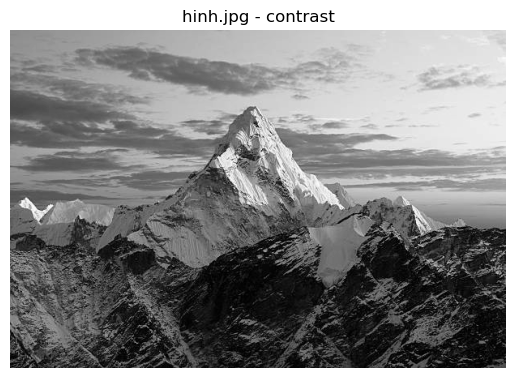

Đã xử lý xong tất cả các phương pháp và lưu kết quả vào thư mục ./output


In [15]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img_norm = img / 255.0
    img_gamma = np.power(img_norm, gamma)
    return np.uint8(img_gamma * 255)

def log_transformation(img):
    c = 255 / np.log(1 + np.max(img))
    img_log = c * np.log(1 + img)
    return np.uint8(img_log)

def histogram_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img):
    a, b = np.min(img), np.max(img)
    stretched = (img - a) * (255 / (b - a))
    return np.uint8(stretched)

def process_and_save(img_path, func, suffix):
    img = Image.open(img_path).convert('L')  # Đọc ảnh và chuyển sang xám
    img_np = np.array(img)
    img_trans = func(img_np)
    
    # Tạo thư mục output nếu chưa có
    out_folder = './output'
    if not os.path.exists(out_folder):
        os.makedirs(out_folder)
    
    # Lưu ảnh kết quả
    out_path = os.path.join(out_folder, os.path.basename(img_path).replace('.jpg', f'_{suffix}.jpg'))
    Image.fromarray(img_trans).save(out_path)
    
    # Hiển thị ảnh
    plt.imshow(img_trans, cmap='gray')
    plt.title(f"{os.path.basename(img_path)} - {suffix}")
    plt.axis('off')
    plt.show()

def main():
    img_path = './hinh.jpg'  # Đường dẫn file ảnh, chỉnh đúng thư mục chứa file nếu cần

    if not os.path.exists(img_path):
        print("Không tìm thấy ảnh:", img_path)
        return

    print("Xử lý ảnh:", img_path)
    
    # Gọi lần lượt các hàm xử lý và lưu kết quả
    process_and_save(img_path, image_inverse, 'inverse')
    process_and_save(img_path, lambda img: gamma_correction(img, 2.2), 'gamma')
    process_and_save(img_path, log_transformation, 'log')
    process_and_save(img_path, histogram_equalization, 'histeq')
    process_and_save(img_path, contrast_stretching, 'contrast')

    print("Đã xử lý xong tất cả các phương pháp và lưu kết quả vào thư mục ./output")

if __name__ == "__main__":
    main()


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def fast_fourier_transform(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    return np.uint8(magnitude_spectrum)

def butterworth_lowpass(img, d0=30, n=2):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow)**2 + (V - ccol)**2)
    H = 1 / (1 + (D / d0)**(2 * n))

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift_filtered = fshift * H
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.abs(np.fft.ifft2(f_ishift))
    return np.uint8(img_back)

def butterworth_highpass(img, d0=30, n=2):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow)**2 + (V - ccol)**2)
    H = 1 / (1 + (d0 / D)**(2 * n))
    H[D == 0] = 0  # tránh chia cho 0

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift_filtered = fshift * H
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.abs(np.fft.ifft2(f_ishift))
    return np.uint8(img_back)

def process_and_save(img_path, func, suffix):
    img = Image.open(img_path).convert('L')
    img_np = np.array(img)
    img_trans = func(img_np)

    # Tạo thư mục output nếu chưa có
    out_folder = './output'
    if not os.path.exists(out_folder):
        os.makedirs(out_folder)

    out_path = os.path.join(out_folder, os.path.basename(img_path).replace('.jpg', f'_{suffix}.jpg'))
    Image.fromarray(img_trans).save(out_path)

    # Hiển thị ảnh
    plt.imshow(img_trans, cmap='gray')
    plt.title(f"{os.path.basename(img_path)} - {suffix}")
    plt.axis('off')
    plt.show()

def main():
    folder = 'exercise'  # Đường dẫn thư mục chứa ảnh .jpg

    # Tạo thư mục exercise nếu chưa có
    if not os.path.exists(folder):
        os.makedirs(folder)
        print("Đã tạo thư mục 'exercise'. Hãy thêm ảnh .jpg vào thư mục này rồi chạy lại chương trình.")
        return

    img_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.lower().endswith('.jpg')]
    if not img_files:
        print("Không tìm thấy ảnh .jpg trong thư mục 'exercise'. Hãy thêm ảnh rồi chạy lại.")
        return

    print("Chọn phương pháp biến đổi ảnh:")
    print("F: Fast Fourier Transform")
    print("L: Butterworth Lowpass Filter")
    print("H: Butterworth Highpass Filter")

    key = input("Nhập lựa chọn (F/L/H): ").upper()

    if key == 'F':
        func, suffix = fast_fourier_transform, 'fft'
    elif key == 'L':
        func, suffix = butterworth_lowpass, 'lowpass'
    elif key == 'H':
        func, suffix = butterworth_highpass, 'highpass'
    else:
        print("Lựa chọn không hợp lệ.")
        return

    for img_path in img_files:
        print("Xử lý ảnh:", img_path)
        process_and_save(img_path, func, suffix)

    print("Đã xử lý xong. Kết quả lưu trong thư mục ./output")

if __name__ == "__main__":
    main()


SyntaxError: EOL while scanning string literal (1506592061.py, line 66)